# Advanced Chemical Reaction Engineering (CBE 60546)
## Homework 4
## Due October 1, 2021

**Carefully and neatly document your answers. You may use a mathematical solver like Jupyter/iPython. Use plotting software for all plots.**

$$\require{mhchem}$$

# 1 Its elementary, realy ...

### 1.1 Which of the following reactions can be assumed to be elementary? If it is elementary, indicate the molecularity. Briefly Justify your answers.

$$\ce{ O3(g) -> O2(g) + O(g)}$$
$$\ce{ 2H2(g) + O2(g) -> H2O(g)}$$
$$\ce{ 2NO(g) + O2(g) -> 2NO2(g)}$$
$$\ce{ H* + I2 -> HI + I*}$$
$$\ce{ 2Pt(111) + H2(g) -> 2Pt(111)-H}$$

In the last example, Pt(111) indicates the surface of a Pt particle.

In [ ]:
# Answer Here

(1) $\ce{ O3(g) -> O2(g) + O(g)}$ - This **is** an elementary reaction that is unimolecular. $\ce{O}$ atom is not a stable specie and will be used in another step.

(2) $\ce{ 2H2(g) + O2(g) -> 2H2O(g)}$ - This **is not** an elementary reaction. This reaction would require several steps to break and reform bonds of reactants and intermediates.

(3) $\ce{ 2NO(g) + O2(g) -> 2NO2(g)}$ - This **is probably not** an elementary reaction as this too would seem to require several steps to break and reform bonds. Experimental evidence is inconclusive.

(4) $\ce{ H* + I2 -> HI + I*}$ - This **is** an elementray step that is bimolecular. This step describes the propogation of a radical from one species to another which is completed in a single step.

(5) $\ce{ 2Pt(111) + H2(g) -> 2Pt(111)-H}$ - Assuming the dissosiation occurs as the molecule adsorbs, this **is** a bimolecular elementary reaction. If the $\ce{H2}$ molecule dissociates after adsorption, then it is not an elementary reaction. Effectively depends on conditions that you observe it at.

# 2 The Path less traveled
Chlorine monoxide, CLO, exhibits three different self-reaction channels:

|     | &emsp;&emsp;$A$ (L mol$^{-1}$s$^{-1}$)&emsp;&emsp; | &emsp;&emsp;$E_{a}$ (kJ mol$^{-1}$)&emsp;&emsp; |
|:--------------------------------:|:----------------------------:|:-----------------------:|
| $\ce{ClO* + ClO*->Cl2 + O2}$     | $ 6.08\times10^{8}   $       |      $13.2$             |
| $\ce{ClO* + ClO*->Cl* + ClOO}$   | $ 1.79\times10^{10}  $       |      $20.4$             |
| $\ce{ClO* + ClO*->Cl* + OClO}$   | $ 2.11\times10^{8}   $       |      $11.4$             |


### 2.1 Make Arrhenius plots of the three reactions from 150 to 500K. Which reaction dominates at low temperature? At high temperature?

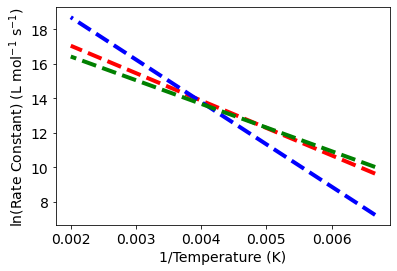

In [ ]:
# Arrhenius equation is: k = A*exp(Ea/R*T) (you can replace R for kb just make units match up correctly)
# Solve for k for a set of T based on the table above

import numpy as np
from scipy import constants # easy way to get physical constants 
import matplotlib.pyplot as plt

# get constants
R = constants.physical_constants['molar gas constant'][0]/1000 # units are kJ mol^-1 K^-1

Temp = np.linspace(150,500,100) # temperature range in K
A = [6.08e8, 1.79e10,2.11e8] # Pre-exponential factor from table
Ea = [13.2,20.4,11.4] # Activation energy from table above

k0=[] # rate constants corresponding to the first reaction
k1=[] # second reaction
k2=[] # third reaction

for t in Temp:
    k0.append(A[0]*np.exp((-1*Ea[0])/(R*t))) # evaluate the Arrhenius equation and save results
    k1.append(A[1]*np.exp((-1*Ea[1])/(R*t)))
    k2.append(A[2]*np.exp((-1*Ea[2])/(R*t)))
    
# Arrhenius plots are present in log form
    
# Make one plot showing the entire range    
plt.plot(1/Temp,np.log(k0),linestyle='dashed',linewidth=4,label='Reaction 1',color='red')   # plot k vs T
plt.plot(1/Temp,np.log(k1),linestyle='dashed',linewidth=4,label='Reaction 2',color='blue')
plt.plot(1/Temp,np.log(k2),linestyle='dashed',linewidth=4,label='Reaction 3',color='green')

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('1/Temperature (K)',size=14)
plt.ylabel(r'ln(Rate Constant) (L mol$^{-1}$ s$^{-1}$)',size=14)
plt.show()

### 2.2 Can Collision theory account for the variations in rate constants amongst the three reactions? Why or Why not?

In [ ]:
# Answer Here

Not really. Collision theory relates rates to rates of collision; it has no way to account for the same colliding species to give different products. 

### 2.3 The rate constant for a gas-phase bimolecular reaction can be written within transition state theory (using an isobaric standard state) as shown below. Use the definition of $E_{a}$ to derive relationships between the Arrhenius parameters and the standard activation enthalpy, $\Delta H^{\circ\ddagger}$ and standard activation entropy , $\Delta S^{\circ\ddagger}$, at 1 bar standard state.

$$ k = \frac{k_{b}T}{h}(\frac{RT}{P^{\circ}})\exp(\frac{-\Delta G^{\circ\ddagger}(T)}"{k_{b}T})$$

In [ ]:
# Answer here

Using the equation above we can do the following: <br>
(1) assuming equilibrium $\Delta G^{\circ \ddagger}(T) = \Delta H^{\circ \ddagger} - T\Delta S^{\circ \ddagger}$ <br>
(2) evaluate the derivate of the function with respect to T <br>
<br>
$$k = \frac{k_{b}T}{h}(\frac{RT}{P^{\circ}})\exp(\frac{-\Delta G^{\circ \ddagger}(T)}{k_{b}T})$$

$$\ln(k) = \ln(\frac{k_{b}RT^2}{hP^{\circ}})+\frac{-\Delta G^{\circ \ddagger}(T)}{k_{b}T}$$

$$\ln(k) = \ln(\frac{k_{b}RT^2}{hP^{\circ}})+\frac{-\Delta H^{\circ \ddagger}}{k_{b}T}+\frac{\Delta S^{\circ \ddagger}}{k_{b}}$$

$$\frac{\partial}{\partial T}\ln(k) = \frac{\partial}{\partial T}(\ln(\frac{k_{b}RT^2}{hP^{\circ}})+\frac{-\Delta H^{\circ \ddagger}}{k_{b}T}+\frac{\Delta S^{\circ \ddagger}}{k_{b}})$$

$$\frac{\partial}{\partial T}\ln(k) = (\frac{hP^{\circ}}{k_{b}RT^2}\frac{2k_{b}RT}{hP^{\circ}}+\frac{\Delta H^{\circ \ddagger}}{k_{b}T^2}+0)$$
<br>
Some units cancel, and we get the relationship:
$$\frac{\partial}{\partial T}\ln(k) = (\frac{2}{T}+\frac{\Delta H^{\circ \ddagger}}{k_{b}T^2})$$
<br>
We can follow the same proceedures for the Arrhenius equation (but it is much simplier)
$$k = A \exp(\frac{-E_a}{k_{b}T})$$
$$\ln(k) = \ln (A) + \frac{-E_a}{k_{b}T}$$
$$\frac{\partial}{\partial T}\ln(k) = \frac{\partial}{\partial T}(\ln (A) + \frac{-E_a}{k_{b}T})$$
$$\frac{\partial}{\partial T}\ln(k) = (0 + \frac{E_a}{k_{b}T^2})$$
<br>
By setting the two equations equal to each other, we get: <br>
$$ \frac{2}{T}+\frac{\Delta H^{\circ \ddagger}}{k_{b}T^2} = \frac{E_a}{k_{b}T^2} $$
<br>
and by some simple manipulation, we get:
$$ \frac{2k_{b}T}{k_{b}T^2}+\frac{\Delta H^{\circ \ddagger}}{k_{b}T^2} = \frac{E_a}{k_{b}T^2} $$ <br>
$$ 2k_{b}T+\Delta H^{\circ \ddagger} = E_a $$
<br>
And thus, $ E_a = 2k_{b}T + \Delta H$ or  $ E_a = 2RT + \Delta H$ the entropy of activation can be evaluated by back solving into one of the equations above

### 2.4 Calculate $\Delta H^{\circ}$ (transition state) and $\Delta S^{\circ}$ (transition state) of the three reactions.

In [ ]:
# Evaluate H using the relationship from above
H0 = Ea[0] - (2*R*Temp) # Enthalpy for reaction 1
H1 = Ea[1] - (2*R*Temp) # reation 2
H2 = Ea[2] - (2*R*Temp) # reaction 3

print('Reaction 1 has an enthalpy of {0:.2f} kJ/mol at 298K'.format(H0[42])) # value H0[42] corresponds to the enthalpy at 298 K
print('Reaction 2 has an enthalpy of {0:.2f} kJ/mol at 298K'.format(H1[42]))
print('Reaction 3 has an enthalpy of {0:.2f} kJ/mol at 298K'.format(H2[42]))

Reaction 1 has an enthalpy of 8.24 kJ/mol at 298K
Reaction 2 has an enthalpy of 15.44 kJ/mol at 298K
Reaction 3 has an enthalpy of 6.44 kJ/mol at 298K


To evaluate $\Delta S^{\circ}$, we need to rearrange $$\ln(k) = \ln(\frac{k_{b}RT^2}{hP^{\circ}})+\frac{-\Delta H^{\circ \ddagger}}{k_{b}T}+\frac{\Delta S^{\circ \ddagger}}{k_{b}}$$ <br>

$$\Delta S^{\circ \ddagger} = (\ln(k) - \ln(\frac{k_{b}RT^2}{hP^{\circ}}))k_{b}+\frac{\Delta H^{\circ \ddagger}}{T}$$

$$\Delta S^{\circ \ddagger} = (\ln(\frac{k}{\frac{k_{b}RT^2}{hP^{\circ}}}))k_{b}+\frac{\Delta H^{\circ \ddagger}}{T}$$
<br> 
**Be careful with units**

In [ ]:
kb = constants.physical_constants['Boltzmann constant'][0] # J K^-1
h = constants.physical_constants['Planck constant'][0] # J sec 
bar_pas = constants.bar # conversion between bar and pascall
liter_m3 = constants.liter # conversion between liter and m^3
Na = constants.physical_constants['Avogadro constant'][0] #avogadro constant (mol^-1)

# Evaluate the three components separatley

# ln(k)
logk0 = np.array(k0)*liter_m3 # reaction 1 units m^3 mol^-1 sec^-1
logk1 = np.array(k1)*liter_m3 # reaction 2
logk2 = np.array(k2)*liter_m3 # reaction 3

# ln(constants)
logCon = (kb*(R*1000)*(Temp**2))/(h*bar_pas) # units m^3 mol^-1 sec^-1

# enthalpy term
H_T0 = H0*1000/Temp
H_T1 = H1*1000/Temp
H_T2 = H2*1000/Temp

S0 = np.log(logk0/logCon)*kb*Na + H_T0 # units are in J mol^-1 K^-1
S1 = np.log(logk1/logCon)*kb*Na + H_T1
S2 = np.log(logk2/logCon)*kb*Na + H_T2

print('Reaction 1 has an entropy of {0:.2f} J/mol K at 298K'.format(S0[42]))
print('Reaction 2 has an entropy of {0:.2f} J/mol K at 298K'.format(S1[42]))
print('Reaction 3 has an entropy of {0:.2f} J/mol K at 298K'.format(S2[42]))

Reaction 1 has an entropy of -120.10 J/mol K at 298K
Reaction 2 has an entropy of -91.98 J/mol K at 298K
Reaction 3 has an entropy of -128.90 J/mol K at 298K


### 2.5 Using chemical intuition and the calculated $\Delta S^{\circ}$ (transition state) as guides, draw candidate transition state structures for each of the three reactions. Include arrows to show motion along the reaction coordinates.

In [ ]:
# see the attached pdf document

### 2.6 following is some thermodynamic data. Use it to sketch/dra/plot a potential enthalpy surface for the three reactions and a potential free energy surface for the three eactions at 298 K.

|     |  &emsp;&emsp; $\Delta H^{\circ}_{f}(298K)$ (kJ mol$^{-1}$) &emsp;&emsp;  |  &emsp;&emsp; $\Delta S^{\circ}_{f}(298K)$ (J mol$^{-1}$) &emsp;&emsp;  |
|:--------------------------------:|:----------------------------:|:-----------------------:|
| $\ce{ClO*}$  |  $101.22$  |  $226.65$  |
| $\ce{OClO*}$  |  $104.60$  |  $257.22$  |
| $\ce{ClO2}$  |  $98.0$  |  $269.32$  |
| $\ce{Cl}$  |  $121.3$  |  $165.19$  |
| $\ce{Cl2}$  |  $0$  |  $223.08$  |
| $\ce{O2}$  |  $0$  |  $205.15$  |

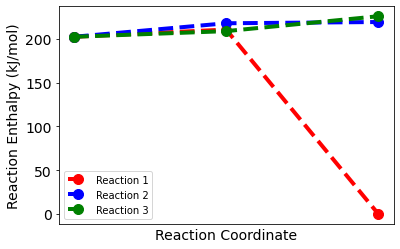

In [ ]:
# Enthalpy PES
H_ClO = 101.22
H_OClO = 104.60
H_ClO2 = 98.0
H_Cl = 121.3
H_Cl2 = 0
H_O2 = 0

H0_react = H_ClO * 2 # location of the reactants
H0_react_trans = H0_react + H0[42] # from question 2.3 (How does the TS change)
H0_prod =  H_Cl2 + H_O2

H1_react = H_ClO * 2 
H1_react_trans = H1_react + H1[42] 
H1_prod =  H_Cl + H_ClO2

H2_react = H_ClO * 2 
H2_react_trans = H2_react + H2[42] 
H2_prod =  H_Cl + H_OClO 


plt.plot([0,1,2],[H0_react,H0_react_trans,H0_prod],color='red',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 1')
plt.plot([0,1,2],[H1_react,H1_react_trans,H1_prod],color='blue',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 2')
plt.plot([0,1,2],[H2_react,H2_react_trans,H2_prod],color='green',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 3')
plt.legend()
plt.ylabel('Reaction Enthalpy (kJ/mol)',size=14)
plt.xlabel('Reaction Coordinate',size=14)
plt.xticks([])
plt.yticks(size=14)
plt.show()


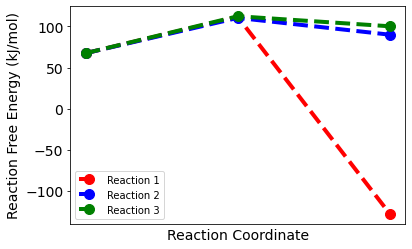

In [ ]:
# Free Energy PES
G_ClO = H_ClO - (298*.22665) #kJ/mol
G_OClO = H_OClO - (298*.25722)
G_ClO2 = H_ClO2 - (298*.26932)
G_Cl = H_Cl - (298*.16519)
G_Cl2 = H_Cl2 - (298*.22308)
G_O2 = H_O2 - (298*.20515)

G0_react = (G_ClO*2)

G0 = H0[42] - (298*S0[42]/1000) + (G_ClO*2)
G1 = H1[42] - (298*S1[42]/1000) + (G_ClO*2)
G2 = H2[42] - (298*S2[42]/1000) + (G_ClO*2)

G0_prod = G_Cl2 + G_O2
G1_prod = G_Cl + G_ClO2
G2_prod = G_Cl + G_OClO

plt.plot([0,1,2],[G0_react,G0,G0_prod],color='red',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 1')
plt.plot([0,1,2],[G0_react,G1,G1_prod],color='blue',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 2')
plt.plot([0,1,2],[G0_react,G2,G2_prod],color='green',marker='o',
         markersize=10,linestyle='dashed',linewidth=4,label = 'Reaction 3')
plt.legend()
plt.ylabel('Reaction Free Energy (kJ/mol)',size=14)
plt.xlabel('Reaction Coordinate',size=14)
plt.xticks([])
plt.yticks(size=14)
plt.show()


# What do I get in compensation?
Following are some observed data for the dehydrogenation of $\textit{iso}$-propanol, $\ce{CH3CH(OH)CH3 -> CH3C(O)CH3 + H2}$, over a series of catalysts:

| &emsp;&emsp;$A$ (s$^{-1}$)&emsp;&emsp; | &emsp;&emsp;$E_{a}$ (kJ mol$^{-1}$)&emsp;&emsp; |
|:----------------------------:|:-----------------------:|
| $ 4.3\times10^{12}   $       |      $172$             |
| $ 2.3\times10^{11}  $        |      $159$             |
| $ 2.2\times10^{10}   $       |      $146$             |
| $ 1.6\times10^{9}   $        |      $134$             |

### 3.1 What can you say about the relationship between $\Delta H^{\circ\ddagger}$ (transition state) and $\Delta S^{\circ\ddagger}$ (transition state)

In [ ]:
# Customize the figure to plot; just to make things pretty. Not mandatory.
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import *

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
rcParams['axes.linewidth'] = 2
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
matplotlib.rc('font', **font)
rcParams['figure.figsize'] = (4, 4)

In [ ]:
from sklearn.metrics import r2_score

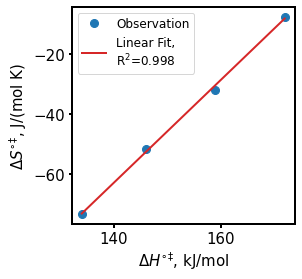

In [ ]:
A = np.array([4.3* 10**12,2.3* 10**11,2.2* 10**10,1.6* 10**9]) 
Ea = np.array([172,159,146,134])

# k = A exp(-Ea/RT) = kB*T/h exp(delta S ddagger/R) exp(-delta H ddagger/RT)
# Ea is approximately equal to delta H ddagger. ln A = ln(kB*T/h)+delta S ddagger/R.
# ln(kB*T/h) is approximately 30. delta S ddagger = (lnA-30)*R
# Plot lnA vs Ea since k = A exp(-Ea/RT)
lnA = np.log(A)
deltaH = Ea
deltaS = (lnA-30)*8.314
plt.plot(deltaH,deltaS, 'o', label = 'Observation')

# Fit the observations with a linear line
linear_model=np.polyfit(deltaH,deltaS,1)
linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(20,31)
# Plot and add R2 in the label
R2 = r2_score(linear_model_fn(deltaH),deltaS)
plt.plot(deltaH,linear_model_fn(deltaH),c='tab:red',label='Linear Fit, \nR$^2$={:.3f}'.format(R2))

plt.legend(fontsize=12)
plt.ylabel('$\Delta S^{\circ\u2021}$, J/(mol K)')
plt.xlabel('$\Delta H^{\circ\u2021}$, kJ/mol')
plt.show()

### We can say there is a compensation relationship between the apparent pre-exponential factor and apparent activation energy. There is likely a compensation relationship between $\Delta H^{\circ\ddagger}_{p}$ (transition state) and $\Delta S^{\circ\ddagger}$ (transition state) of the rate-controlling step.

# 4 The Radical Path
At high temperature, ethylene can be hydrogenated to ethane. The proposed mechanism has four steps, all of which are presumed to be elementary and essentially irreversible under realistic conditions.

$$ \ce{C2H4(g) + H2(g) ->[k_{1}] C2H5*(g) + H*(g)} $$
<br>
$$ \ce{H*(g) + C2H4(g) ->[k_{2}] C2H5*(g)} $$
<br>
$$ \ce{C2H5*(g) + H2(g) ->[k_{3}] C2H6(g) + H*(g)} $$
<br>
$$ \ce{C2H5*(g) + H*(g) ->[k_{4}] C2H6(g)} $$

### 4.1 Identify the reactants, products, and intermediates, and state whether the mechanism is open or closed.

In [ ]:
# Answer Here
print ("Reactants are C2H4 and H2, product is C2H6 and intermediates are H and C2H5 radicals.")
print ("The mechanism is open. reaction 1 + reaction 4 = overall reaction and reaction 2 + reaction 3 = overall reaction.")

Reactants are C2H4 and H2, product is C2H6 and intermediates are H and C2H5 radicals.
The mechanism is open. reaction 1 + reaction 4 = overall reaction and reaction 2 + reaction 3 = overall reaction.


### 4.2 Why is it reasonable to assume that the first reaction is irreversible (that is, that the forward reaction rate is much greater than the reverse)? What about the second reaction?

In [ ]:
print ('1. Densities of C2H5 and H are small.\nThe reverse reaction will likely have a very negative reaction enthalpy since both reactants are radicals.\nThe energy released from the reversed reaction cannot be easily dissipated to the formed C2H4 and H2.')

print ('2. The second reaction could be irreversible.\nC-H bond (with high bond strength) breakage in a C2H5 molecule without a collision is unlikely.\nDensity of C2H5 is small and the rate is low. H density is also small, but C2H4 density is large.')

1. Densities of C2H5 and H are small.
The reverse reaction will likely have a very negative reaction enthalpy since both reactants are radicals.
The energy released from the reversed reaction can not be easily dissipated to the formed C2H4 and H2.
2. The second reaction could be irreversible.
C-H bond (with high bond strength) breakage in a C2H5 molecule without a collision is unlikely.
Density of C2H5 is small and the rate is low. H density is also small, but C2H4 density is large.


### 4.3 Based on the mechanism above, write an expression for the rate of disapearance of ethylene.

$\frac{dC_{\ce{C2H4}}}{dt} = -k_1 C_{\ce{C2H4}}C_{\ce{H2}}-k_2 C_{\ce{C2H4}}C_{\ce{H*}}$

### 4.4 Apply the quasi-steady-state approximation seperately to H atoms and ethyl radicals. Use the results to derive expressions for the concentrations of each in terms of only reactants and products.

$\frac{dC_{\ce{C2H5*}}}{dt} = k_1 C_{\ce{C2H4}}C_{\ce{H2}}+k_2 C_{\ce{C2H4}}C_{\ce{H*}}-k_3 C_{\ce{C2H5*}}C_{\ce{H2}}-k_4 C_{\ce{C2H5*}}C_{\ce{H*}}$ (1)

$\frac{dC_{\ce{H*}}}{dt} = k_1 C_{\ce{C2H4}}C_{\ce{H2}}-k_2 C_{\ce{C2H4}}C_{\ce{H*}}+k_3 C_{\ce{C2H5*}}C_{\ce{H2}}-k_4 C_{\ce{C2H5*}}C_{\ce{H*}}$ (2)

At quasi-steady-state, concentrations of intermediates are constants.

$\frac{dC_{\ce{C2H5*}}}{dt} = 0$ 

$\frac{dC_{\ce{H*}}}{dt} = 0 $

Solve the two algebraic equations with two unknowns. 

$C_{\ce{H*}} = \sqrt{\frac{k_1k_3}{k_2k_4}}C_{\ce{H2}}$

$C_{\ce{C2H5*}} = \sqrt{\frac{k_1k_2}{k_3k_4}}C_{\ce{C2H4}}$

### 4.5 Combine your answers to obtain an expression for the rate of disapearance of ethylene that involves only reactants and products. What is the apparent reaction order with respect to $\ce{H2}$? To $\ce{C2H4}$?

$\frac{dC_{\ce{C2H4}}}{dt} = -k_1 C_{\ce{C2H4}}C_{\ce{H2}}-k_2 C_{\ce{C2H4}}C_{\ce{H*}} = -k_1 C_{\ce{C2H4}}C_{\ce{H2}} - k_2 C_{\ce{C2H4}}\sqrt{\frac{k_1k_3}{k_2k_4}}C_{\ce{H2}}$

$\frac{dC_{\ce{C2H4}}}{dt}  = \left(-k_1- \sqrt{\frac{k_1k_2k_3}{k_4}}\right)C_{\ce{C2H4}}C_{\ce{H2}}$

Apparent orders with $\ce{H2}$ and $\ce{C2H4}$ are both 1.

### 4.6 What is the apparent rate constant? Do you expect it to exhibit Arrhenius behavior in general?

Apparent rate constant is $k_1 + \sqrt{\frac{k_1k_2k_3}{k_4}}$.

Even if each k is Arrhenius, the combination is not.

### 4.7 Ethane dissociation $\ce{C2H6 -> 2 CH3}$ is a key step in the initiation of gas-phase ethane reactions. If the reaction is observed in a diluent, say $\ce{N2}$, the rate is found to be a function of total pressure and to reach a limiting value at high pressure. Why? Can you propose a simple model for this behavior?

$\ce{C2H6 + N2 <-> C2H6^\ast + N2}$

$\ce{C2H6^\ast -> 2CH3}$

$\frac{dC_{\ce{C2H6}*}}{dt} = k_1C_{\ce{C2H6}}C_{\ce{N2}}-k_{-1}C_{\ce{C2H6}*}C_{\ce{N2}}-k_2C_{\ce{C2H6}*}$

At steady state, $\frac{dC_{\ce{C2H6}*}}{dt}=0$

$C_{\ce{C2H6}*} = \frac{k_1C_{\ce{C2H6}}C_{\ce{N2}}}{k_{-1}C_{\ce{N2}}+k_2}$

$\frac{dC_{\ce{CH3}}}{dt} = 2\frac{k_2k_1C_{\ce{C2H6}}C_{\ce{N2}}}{k_{-1}C_{\ce{N2}}+k_2}$

When $C_{\ce{N2}}$ is small, total pressure impacts the rate of $\ce{CH3}$ generation. 

When $C_{\ce{N2}}$ is large but $C_{\ce{C2H6}}$ is a constant, $\frac{dC_{\ce{CH3}}}{dt} = 2\frac{k_2k_1C_{\ce{C2H6}}}{k_{-1}}$. The rate will reach a limiting value.
